In [54]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [55]:
predicted_movies=[]

In [56]:
pre_zero_rated_movies=[]

In [57]:
rating_column=['userId','movieId','rating','timestamp']
ratings_df=pd.read_csv('ratings.csv',names=rating_column)

In [58]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [59]:
movie_column=['movieId','title','genres']
movies_df=pd.read_csv('movies.csv',names=movie_column,encoding="ISO-8859-1")
movies_df['movieId'] = movies_df.index

In [60]:
movies_df.head()

,movieId,title,genres
0,0,Toy Story (1995),Animation|Children's|Comedy
1,1,Jumanji (1995),Adventure|Children's|Fantasy
2,2,Grumpier Old Men (1995),Comedy|Romance
3,3,Waiting to Exhale (1995),Comedy|Drama
4,4,Father of the Bride Part II (1995),Comedy


In [9]:
genre_popularity = (movies_df.genres.str.split('|')
                      .explode()
                      .value_counts()
                      .sort_values(ascending=False))
genre_popularity.head(10)

Drama         1603
Comedy        1199
Action         503
Thriller       492
Romance        471
Horror         343
Adventure      283
Sci-Fi         276
Children's     251
Crime          211
Name: genres, dtype: int64

(-0.5, 999.5, 399.5, -0.5)

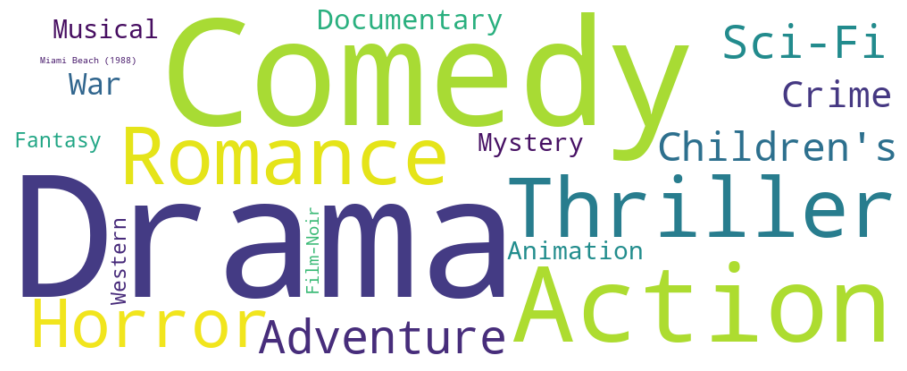

In [10]:
genre_wc = WordCloud(width=1000,height=400,background_color='white')
genre_wc.generate_from_frequencies(genre_popularity.to_dict())
plt.figure(figsize=(16, 8))
plt.imshow(genre_wc, interpolation="bilinear")
plt.axis('off')

In [11]:
movies_df=movies_df.assign(genres=movies_df['genres'].str.split('|'))
movies_df.head()

,movieId,title,genres
0,0,Toy Story (1995),"[Animation, Children's, Comedy]"
1,1,Jumanji (1995),"[Adventure, Children's, Fantasy]"
2,2,Grumpier Old Men (1995),"[Comedy, Romance]"
3,3,Waiting to Exhale (1995),"[Comedy, Drama]"
4,4,Father of the Bride Part II (1995),[Comedy]


In [12]:
def combine_features(row):
  return ' '.join(row['genres'])

In [13]:
movies_df['combined_features'] = movies_df.apply(combine_features,axis=1)
movies_df.head()

,movieId,title,genres,combined_features
0,0,Toy Story (1995),"[Animation, Children's, Comedy]",Animation Children's Comedy
1,1,Jumanji (1995),"[Adventure, Children's, Fantasy]",Adventure Children's Fantasy
2,2,Grumpier Old Men (1995),"[Comedy, Romance]",Comedy Romance
3,3,Waiting to Exhale (1995),"[Comedy, Drama]",Comedy Drama
4,4,Father of the Bride Part II (1995),[Comedy],Comedy


In [14]:
cv = CountVectorizer()
count_matrix = cv.fit_transform(movies_df['combined_features'])

In [15]:
cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [16]:
similarity_df= pd.DataFrame(cosine_sim)

In [17]:
similarity_df.head()

,0,1,2,3,4,5,6,7,8,9,...,3873,3874,3875,3876,3877,3878,3879,3880,3881,3882
0,1.000000,0.333333,0.408248,0.408248,0.577350,0.0,0.408248,0.408248,0.0,0.000000,...,0.577350,0.408248,0.666667,0.000000,0.0,0.577350,0.000000,0.000000,0.000000,0.0
1,0.333333,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.816497,0.0,0.333333,...,0.000000,0.000000,0.666667,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
2,0.408248,0.000000,1.000000,0.500000,0.707107,0.0,1.000000,0.000000,0.0,0.000000,...,0.707107,0.500000,0.000000,0.000000,0.0,0.707107,0.000000,0.000000,0.000000,0.0
3,0.408248,0.000000,0.500000,1.000000,0.707107,0.0,0.500000,0.000000,0.0,0.000000,...,0.707107,1.000000,0.000000,0.408248,0.0,0.707107,0.707107,0.707107,0.707107,0.5
4,0.577350,0.000000,0.707107,0.707107,1.000000,0.0,0.707107,0.000000,0.0,0.000000,...,1.000000,0.707107,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.0


In [18]:
print(similarity_df.values.tolist()[0:5])

[[1.0000000000000002, 0.3333333333333334, 0.408248290463863, 0.408248290463863, 0.5773502691896258, 0.0, 0.408248290463863, 0.408248290463863, 0.0, 0.0, 0.3333333333333334, 0.408248290463863, 0.816496580927726, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5773502691896258, 0.0, 0.3333333333333334, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6666666666666669, 0.0, 0.0, 0.0, 0.5773502691896258, 0.408248290463863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.408248290463863, 0.0, 0.0, 0.5773502691896258, 0.0, 0.0, 0.0, 0.5773502691896258, 0.0, 0.816496580927726, 0.0, 0.3333333333333334, 0.0, 0.0, 0.0, 0.3333333333333334, 0.0, 0.0, 0.5773502691896258, 0.408248290463863, 0.5773502691896258, 0.0, 0.0, 0.408248290463863, 0.5773502691896258, 0.25819888974716115, 0.0, 0.408248290463863, 0.0, 0.0, 0.408248290463863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.408248290463863, 0.0, 0.0, 0.816496580927726, 0.5773502691896258, 0.0, 0.0, 0.0, 0.408248290463863, 0.0, 0.0, 0.5773502691896258, 0.0, 0.0, 0.0, 0.0, 0.577350

In [19]:
man=[]
for i in range(0,3706):
    man.append(str(i))
print(man[0:5])

['0', '1', '2', '3', '4']


In [53]:
movie_ratings=ratings_df.pivot(index='movieId',columns='userId',values='rating')
movie_ratings.index= man
movie_ratings=movie_ratings.T
movie_ratings.head(10)

,0,1,2,3,4,5,6,7,8,9,...,3696,3697,3698,3699,3700,3701,3702,3703,3704,3705
userId,,,,,,,,,,,,,,,,,,,,,
1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,4.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN


In [21]:
movie_ratings.fillna(0,inplace=True)
print(len(movie_ratings))
movie_ratings.head(10)

6040


,0,1,2,3,4,5,6,7,8,9,...,3696,3697,3698,3699,3700,3701,3702,3703,3704,3705
userId,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,4.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0


In [22]:
n=movie_ratings.to_numpy()
print(n[0:5])

[[5. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [23]:
m=[]
for i in range(3706):  #list of list containing movie id and rating giving by "user 9"
    x=[]
    x.append(i)
    x.append(n[8][i])
    m.extend(list(x))

users=[]
for i in range(0,len(m),2):
    k=m[i:i+2]
    #print(k)
    users.append(k)
print(users)

[[0, 5.0], [1, 0.0], [2, 0.0], [3, 0.0], [4, 0.0], [5, 0.0], [6, 0.0], [7, 0.0], [8, 0.0], [9, 0.0], [10, 0.0], [11, 0.0], [12, 0.0], [13, 0.0], [14, 0.0], [15, 4.0], [16, 0.0], [17, 0.0], [18, 0.0], [19, 0.0], [20, 0.0], [21, 0.0], [22, 0.0], [23, 0.0], [24, 4.0], [25, 0.0], [26, 0.0], [27, 0.0], [28, 0.0], [29, 0.0], [30, 0.0], [31, 0.0], [32, 0.0], [33, 0.0], [34, 0.0], [35, 0.0], [36, 0.0], [37, 0.0], [38, 0.0], [39, 0.0], [40, 0.0], [41, 0.0], [42, 0.0], [43, 0.0], [44, 0.0], [45, 0.0], [46, 5.0], [47, 0.0], [48, 0.0], [49, 4.0], [50, 0.0], [51, 0.0], [52, 0.0], [53, 0.0], [54, 0.0], [55, 0.0], [56, 0.0], [57, 0.0], [58, 0.0], [59, 0.0], [60, 0.0], [61, 0.0], [62, 0.0], [63, 0.0], [64, 0.0], [65, 0.0], [66, 0.0], [67, 0.0], [68, 0.0], [69, 0.0], [70, 0.0], [71, 0.0], [72, 0.0], [73, 0.0], [74, 0.0], [75, 0.0], [76, 0.0], [77, 0.0], [78, 0.0], [79, 0.0], [80, 0.0], [81, 0.0], [82, 0.0], [83, 0.0], [84, 0.0], [85, 0.0], [86, 0.0], [87, 0.0], [88, 0.0], [89, 0.0], [90, 0.0], [91, 0.0

In [24]:
req_ratings=[[i[0],i[1]]for i in users if(i[1]>=1)]
print(req_ratings[0:10])#taking the movies for which user-9 rated

[[0, 5.0], [15, 4.0], [24, 4.0], [46, 5.0], [49, 4.0], [144, 3.0], [156, 4.0], [216, 4.0], [291, 4.0], [309, 5.0]]


In [25]:
Top_req_rations=req_ratings[0:5]

In [53]:
# new_sim=[]
# for i in range(len(req_ratings)):
#     m=[]
#     l=req_ratings[i][0]
#     for j in range(len(req_sim_list)):
#         if(l==req_sim_list[j][0]):
#             l1=[]
#             l1.append(l)
#             l1.append(req_sim_list[j][1])
#             m.append(list(l1))
#     new_sim.extend(m)
# print(new_sim[0:10])

In [ ]:
below in the code:
    first i am passing at movies user has alredy wateched and finding rating to that.
    and subtracting the obtained value from original to see deviation
    
    when i first passed the toy story, i getting the index of it.
    then the 10 movies that are simular to toystory.
    sorting thses 10 movies in desc order.
    now, in these 10 movies, he might not seen all.
    i am taking only movies which he watched in that 10 movies and applying formula and getting a value.
    that value is the rating i have obtained.
    
    lly pass one by one movie.

In [30]:
def get_index_from_title(title):
    return movies_df[movies_df.title == title]["movieId"].values[0]

movie_user_likes = input("Enter a movie name: ")
movie_index = get_index_from_title(movie_user_likes)
print("Corresponding Movie index: ",movie_index)

similar_movies = list(enumerate(cosine_sim[movie_index],movie_index))

movie_sim_list=[]
for i in similar_movies:
    movie_sim_list.append(list(i))

sorted_similar_movies = sorted(similar_movies, key=lambda x:x[1], reverse=True)

req_sim_list = [list(ele) for ele in sorted_similar_movies]

new_sim=[]
for i in range(len(req_ratings)):
    m=[]
    l=req_ratings[i][0]
    for j in range(len(req_sim_list)):
        if(l==req_sim_list[j][0]):
            l1=[]
            l1.append(l)
            l1.append(req_sim_list[j][1])
            m.append(list(l1))
    new_sim.extend(m)
print(new_sim[0:10])

numerator=0
for i in range(len(new_sim)):
    for j in range(len(req_ratings)):
        if(new_sim[i][0]==req_ratings[j][0]):
              numerator=numerator+(new_sim[i][1]*req_ratings[j][1])
print(numerator)

denominator=0
for i in range(len(new_sim)):
    denominator=denominator+new_sim[i][1]
print("sum :",denominator)

result_ratings=numerator/denominator
print(result_ratings)

temp=[]
temp.append(movie_index)
temp.append(result_ratings)

predicted_movies.append(temp)
print(predicted_movies) #here we passed only 5 movies which he already seen one by one
# Toy Story (1995),Casino (1995),Leaving Las Vegas (1995),Seven (Se7en) (1995),Usual Suspects, The (1995),

Enter a movie name: Usual Suspects, The (1995)
Corresponding Movie index:  49
[[49, 0.0], [144, 0.0], [156, 0.0], [216, 0.0], [291, 0.4999999999999999], [309, 0.0], [339, 0.7071067811865475], [357, 0.4999999999999999], [367, 0.0], [398, 0.408248290463863]]
35.75286526661511
sum : 9.625236171302522
3.7144922607937323
[[0, 3.7514783279261525], [15, 3.692707089227385], [24, 3.6964065304388907], [46, 3.8767585976267185], [49, 3.7144922607937323]]


In [40]:
def get_index_from_title(title):
    return movies_df[movies_df.title == title]["movieId"].values[0]

movie_user_likes = input("Enter a movie name: ")
movie_index = get_index_from_title(movie_user_likes)
print("Corresponding Movie index: ",movie_index)

similar_movies = list(enumerate(cosine_sim[movie_index],movie_index))

movie_sim_list=[]
for i in similar_movies:
    movie_sim_list.append(list(i))

sorted_similar_movies = sorted(similar_movies, key=lambda x:x[1], reverse=True)

req_sim_list = [list(ele) for ele in sorted_similar_movies]

new_sim=[]
for i in range(len(req_ratings)):
    m=[]
    l=req_ratings[i][0]
    for j in range(len(req_sim_list)):
        if(l==req_sim_list[j][0]):
            l1=[]
            l1.append(l)
            l1.append(req_sim_list[j][1])
            m.append(list(l1))
    new_sim.extend(m)
print(new_sim[0:10])

numerator=0
for i in range(len(new_sim)):
  for j in range(len(req_ratings)):
    if(new_sim[i][0]==req_ratings[j][0]):
      numerator=numerator+(new_sim[i][1]*req_ratings[j][1])
print(numerator)

denominator=0
for i in range(len(new_sim)):
    denominator=denominator+new_sim[i][1]
print("sum :",denominator)

result_ratings=numerator/denominator
print(result_ratings)

temp=[]
temp.append(movie_index)
temp.append(result_ratings)
pre_zero_rated_movies.append(temp)
print(pre_zero_rated_movies)
#therse are the movies wjich he did not see
# Jumanji (1995)
# Grumpier Old Men (1995)
# Waiting to Exhale (1995)
# Father of the Bride Part II (1995)
# Heat (1995)
# Sabrina (1995)
# Tom and Huck (1995)
# Sudden Death (1995)
# GoldenEye (1995)
# American President, The (1995)

Enter a movie name: American President, The (1995)
Corresponding Movie index:  10
[[15, 0.0], [24, 0.3333333333333334], [46, 0.0], [49, 0.5773502691896258], [144, 0.0], [156, 0.5773502691896258], [216, 0.0], [291, 0.0], [309, 0.816496580927726], [339, 0.5773502691896258]]
156.1554944949585
sum : 40.46590326148813
3.8589400435693104
[[1, 3.800009292082861], [2, 3.7857260512517987], [3, 3.7106694206009325], [4, 3.6650909859782783], [5, 3.9029042002782046], [6, 3.8405499755930013], [7, 3.818507880312855], [8, 3.818192201410616], [9, 3.963552218044624], [10, 3.8589400435693104]]


In [41]:
d=0
for i in range(len(Top_req_rations)):
    if(Top_req_rations[i][0]==predicted_movies[i][0]):
        d=d+(Top_req_rations[i][1]-predicted_movies[i][1])
print(d)#sum of deviations of all

3.268157193987121


In [42]:
deviation=d/len(predicted_movies)
print(deviation)

0.6536314387974242


In [43]:
movie_index=[]
for i in pre_zero_rated_movies:
    movie_index.append(i[0])
print(movie_index)

movie_predictive_rat=[]
for i in pre_zero_rated_movies:
    movie_predictive_rat.append(i[1])
print(movie_predictive_rat)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[3.800009292082861, 3.7857260512517987, 3.7106694206009325, 3.6650909859782783, 3.9029042002782046, 3.8405499755930013, 3.818507880312855, 3.818192201410616, 3.963552218044624, 3.8589400435693104]


In [44]:
for i in range(len(movie_predictive_rat)):
    for j in range(len(movie_predictive_rat)-i-1):
        if(movie_predictive_rat[j]<movie_predictive_rat[j+1]):
            movie_predictive_rat[j],movie_predictive_rat[j+1]=movie_predictive_rat[j+1],movie_predictive_rat[j]
            movie_index[j],movie_index[j+1]=movie_index[j+1],movie_index[j]
print(movie_index)
print(movie_predictive_rat)

[9, 5, 10, 6, 7, 8, 1, 2, 3, 4]
[3.963552218044624, 3.9029042002782046, 3.8589400435693104, 3.8405499755930013, 3.818507880312855, 3.818192201410616, 3.800009292082861, 3.7857260512517987, 3.7106694206009325, 3.6650909859782783]


In [45]:
final_recomendation=[]
for i in range(len(movie_index)):
    l=[]
    l.append(movie_index[i])
    l.append(movie_predictive_rat[i])
    final_recomendation.append(l)
print(final_recomendation)

[[9, 3.963552218044624], [5, 3.9029042002782046], [10, 3.8589400435693104], [6, 3.8405499755930013], [7, 3.818507880312855], [8, 3.818192201410616], [1, 3.800009292082861], [2, 3.7857260512517987], [3, 3.7106694206009325], [4, 3.6650909859782783]]


In [46]:
taken=movies_df.iloc[:,[0,1]]
taken.head()

,movieId,title
0,0,Toy Story (1995)
1,1,Jumanji (1995)
2,2,Grumpier Old Men (1995)
3,3,Waiting to Exhale (1995)
4,4,Father of the Bride Part II (1995)


In [47]:
len(taken)

3883

In [48]:
taken_list=taken.values.tolist()
top_taken_list=taken_list[1:11]
print((top_taken_list))

[[1, 'Jumanji (1995)'], [2, 'Grumpier Old Men (1995)'], [3, 'Waiting to Exhale (1995)'], [4, 'Father of the Bride Part II (1995)'], [5, 'Heat (1995)'], [6, 'Sabrina (1995)'], [7, 'Tom and Huck (1995)'], [8, 'Sudden Death (1995)'], [9, 'GoldenEye (1995)'], [10, 'American President, The (1995)']]


In [49]:
final_movies_recommended=[]
for i in range(len(final_recomendation)):
    if(final_recomendation[i][0]!=top_taken_list[i][0]):
        continue
    else:
        temp=[]
        temp.append(final_recomendation[i][0])
        temp.append(top_taken_list[i][1])
        final_movies_recommended.append(temp)
        print(final_movies_recommended)

In [50]:
final_movies_recommended=[]
for i in range(len(final_recomendation)):
    mk=[]
    lk= final_recomendation[i][0]
    for j in range(len(top_taken_list)):
        if(lk==req_sim_list[j][0]):
            l1=[]
            l1.append(top_taken_list[j][1])
             
 

In [51]:
final_movies_recommended=[]
for i in range(len(final_recomendation)):
    temp=final_recomendation[i][0]
    for j in range(len(top_taken_list)):
        if(temp==top_taken_list[j][0]):
            m=[]
            m.append(temp)
            m.append(top_taken_list[j][1])
            final_movies_recommended.append(m)
print(final_movies_recommended)
        

[[9, 'GoldenEye (1995)'], [5, 'Heat (1995)'], [10, 'American President, The (1995)'], [6, 'Sabrina (1995)'], [7, 'Tom and Huck (1995)'], [8, 'Sudden Death (1995)'], [1, 'Jumanji (1995)'], [2, 'Grumpier Old Men (1995)'], [3, 'Waiting to Exhale (1995)'], [4, 'Father of the Bride Part II (1995)']]


In [52]:
recomendation_movies_for_user = pd.DataFrame(final_movies_recommended, columns =['movie_id', 'title'])
recomendation_movies_for_user[0:5]

,movie_id,title
0,9,GoldenEye (1995)
1,5,Heat (1995)
2,10,"American President, The (1995)"
3,6,Sabrina (1995)
4,7,Tom and Huck (1995)
